<a href="https://colab.research.google.com/github/Agilgeorge/Naan-mudhalvan/blob/main/ADS_phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
for dirname, _, filenames in os.walk('MSFT.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
nRowsRead = 1000
df1 = pd.read_csv('MSFT.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MSFT.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [ ]:
df1.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061432,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.059756,59990400


In [ ]:
plotPerColumnDistribution(df1, 10, 5)


<Figure size 2400x512 with 0 Axes>

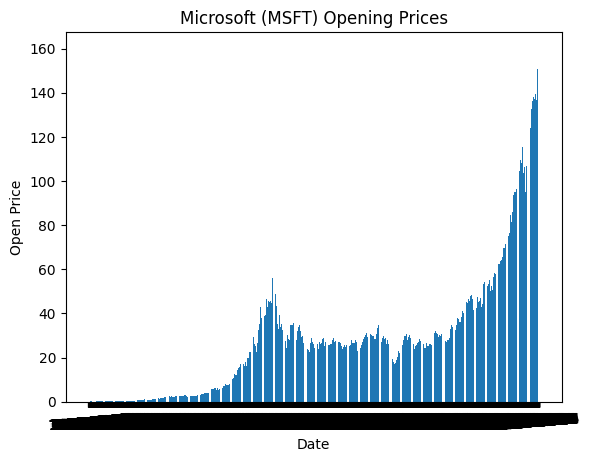

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
x = df['Date']
y = df['Open']
plt.bar(x, y)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Microsoft (MSFT) Opening Prices')
plt.xticks(rotation=5)
plt.show()

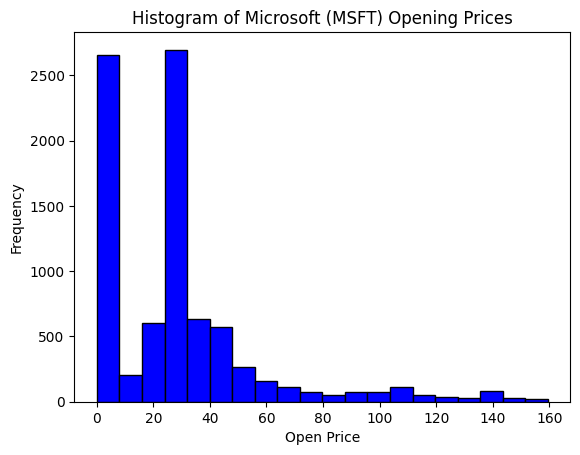

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
data = df['Open']
plt.hist(data, bins=20, color='blue', edgecolor='black')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Histogram of Microsoft (MSFT) Opening Prices')
plt.show()

<ipython-input-50-4cb4f64344d3>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')  # Drop columns with NaN
<ipython-input-50-4cb4f64344d3>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


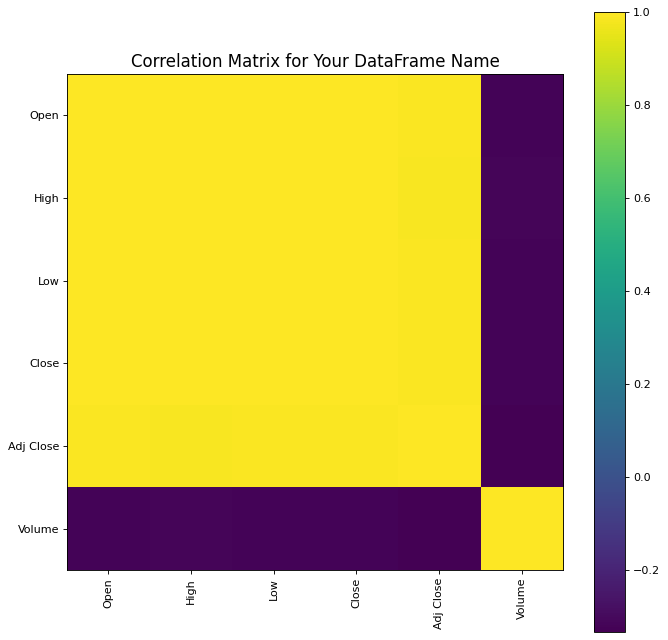

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
df.dataframeName = 'Your DataFrame Name'
plotCorrelationMatrix(df, graphWidth)


<ipython-input-57-51a60caf2dda>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


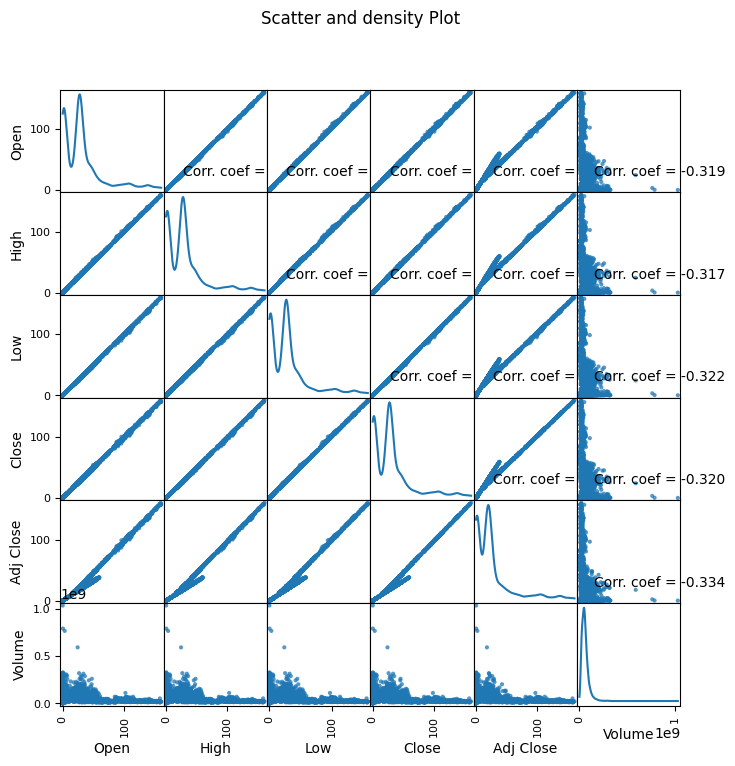

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the plotScatterMatrix function
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]

    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]

    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and density Plot')
    plt.show()
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
plotSize = 8
textSize = 10
plotScatterMatrix(df, plotSize, textSize)


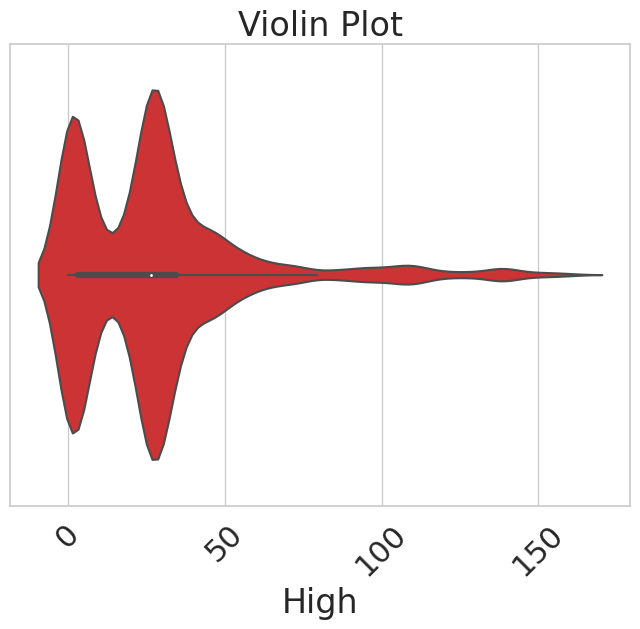

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define the plotScatterMatrix function (your existing function)

def plotScatterMatrix(df, plotSize, textSize):
    # Select only numeric columns from the DataFrame
    numeric_df = df.select_dtypes(include=[np.number])

    # Drop columns with missing values
    numeric_df = numeric_df.dropna('columns')

    # Drop columns with only one unique value
    numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

    # Limit the number of columns if there are more than 10
    if numeric_df.shape[1] > 10:
        numeric_df = numeric_df.iloc[:, :10]

    # Create a scatter matrix plot using seaborn
    plt.figure(figsize=(plotSize, plotSize))
    sns.set(font_scale=textSize)
    sns.set_style("whitegrid")
    sns.pairplot(numeric_df, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.75})

    # Add correlation coefficients to the upper triangle of the plot
    corrs = numeric_df.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):

    plt.suptitle('Scatter and Density Plot')

    plt.show()



file_path = 'MSFT.csv'
df = pd.read_csv(file_path)

plt.figure(figsize=(8, 6))
sns.violinplot(x=df['High'], palette="Set1")
plt.title('Violin Plot')
plt.xticks(rotation=45)
plt.show()
